#Mounting Google Drive for File Access


In [ ]:
# Mount Google Drive to access files stored in it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries for Data Processing and Model Building

In [ ]:
# Import libraries for data handling, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Data Preprocessing, Model Training, and Evaluation

In [ ]:
# Data preprocessing and feature selection
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FML PROJECT/Dataset.csv")  # Load dataset
df = df.drop(["Unnamed: 0", "BMI_tags", "Label"], axis=1)  # Drop unnecessary columns
df = pd.get_dummies(df, columns=['gender'], drop_first=False)  # Convert categorical column 'gender' to dummy variables

# Define features and target variable
X = df.drop(['calories_to_maintain_weight'], axis=1)  # Features (excluding target variable)
Y = df['calories_to_maintain_weight']  # Target variable

# Print first few rows of features and target for verification
print("X:\n", X.head())
print("Y:\n", Y.head())

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Train the model
modelLR = LinearRegression()
modelLR.fit(X_train, Y_train)

# Predict and evaluate model performance
Y_pred = modelLR.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)  # Calculate Mean Squared Error
print(f'Mean Squared Error: {mse}')

accuracy = modelLR.score(X_test, Y_test)  # Calculate model accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

X:
    age  weight(kg)  height(m)        BMI      BMR  activity_level  gender_F  \
0    2   16.097862   0.932025  18.531612  958.584             1.2      True   
1    4   14.619374   0.916687  17.397496  932.383             1.7      True   
2    4   17.899918   0.997288  17.997414  977.578             1.9      True   
3    3   13.532880   1.022786  12.936609  944.689             1.9      True   
4    4   17.039484   1.053977  15.338909  799.229             1.9     False   

   gender_M  
0     False  
1     False  
2     False  
3     False  
4      True  
Y:
 0    1150.3008
1    1585.0511
2    1857.3982
3    1794.9091
4    1518.5351
Name: calories_to_maintain_weight, dtype: float64
Mean Squared Error: 1966.029133148054
Accuracy: 98.74%


#Extracting and Visualizing Feature Importance

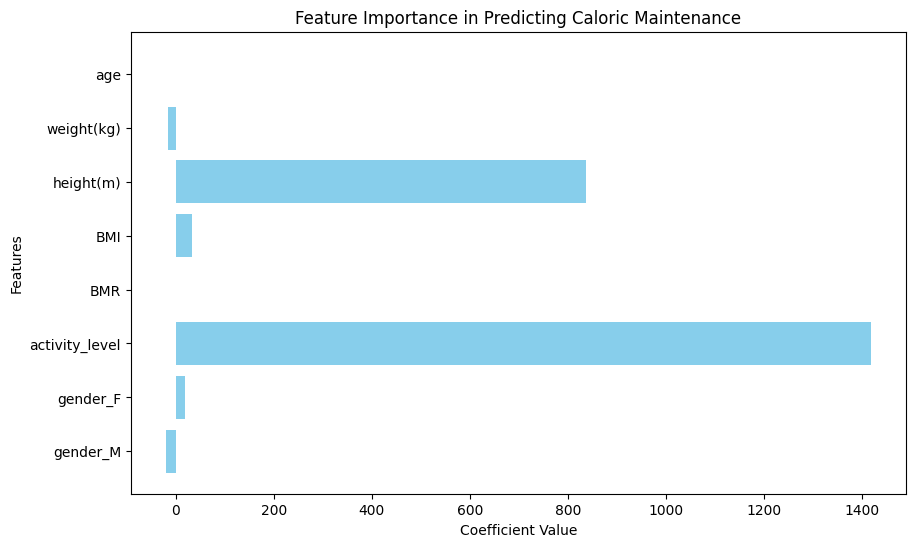

In [ ]:
# Get the model coefficients and corresponding feature names
coefficients = modelLR.coef_
features = X.columns

# Create a DataFrame to display feature importance based on coefficients
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Plot a horizontal bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')  # Plotting the bar chart
plt.xlabel('Coefficient Value')  # Label for X-axis
plt.ylabel('Features')  # Label for Y-axis
plt.title('Feature Importance in Predicting Caloric Maintenance')  # Title of the plot
plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.show()  # Display the plot

#Plotting Actual vs Predicted Calories for Model Evaluation

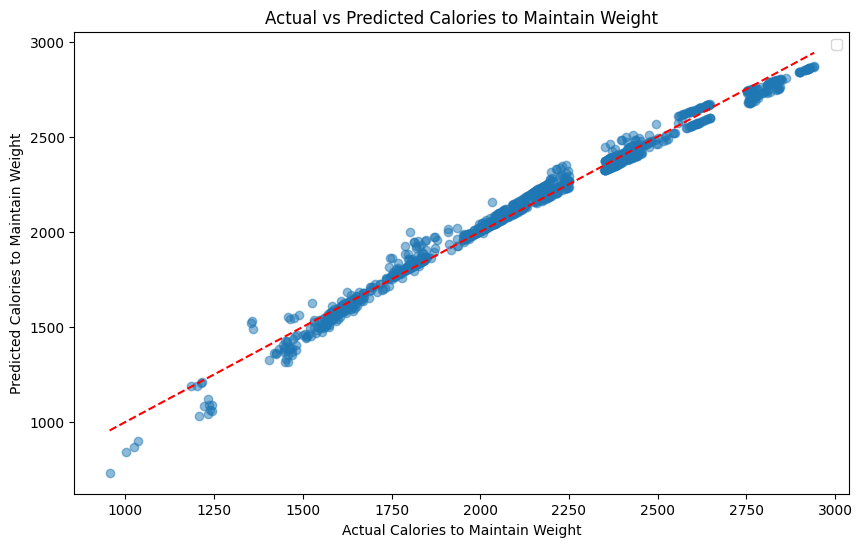

In [ ]:
# Plotting the actual vs predicted values to assess model performance
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)  # Scatter plot of actual vs predicted values
plt.xlabel('Actual Calories to Maintain Weight')  # Label for X-axis
plt.ylabel('Predicted Calories to Maintain Weight')  # Label for Y-axis
plt.title('Actual vs Predicted Calories to Maintain Weight')  # Plot title
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')  # Diagonal line for perfect prediction
plt.legend()  # Show legend
plt.show()  # Display the plot

#Calculating Daily Calories Based on Weight Change and User Inputs


In [ ]:
import numpy as np

# Function to calculate BMI (Body Mass Index)
def calculate_bmi(weight_kg, height_m):
    return weight_kg / (height_m ** 2)

# Function to calculate BMR (Basal Metabolic Rate) based on gender and other factors
def calculate_bmr(age, weight_kg, height_m, gender_F, gender_M):
    if gender_F == 1:  # Female
        return 655 + (9.6 * weight_kg) + (1.8 * height_m * 100) - (4.7 * age)
    elif gender_M == 1:  # Male
        return 66 + (13.7 * weight_kg) + (5 * height_m * 100) - (6.8 * age)
    else:
        raise ValueError("Invalid gender values")

# Function to calculate daily calories for weight change goals
def calculate_daily_calories_direct(user_inputs, initial_weight, desired_weight, time_interval, modelLR):
    # Extract user input data
    age = user_inputs['age']
    weight_kg = user_inputs['weight(kg)']
    height_m = user_inputs['height(m)']
    gender_F = user_inputs['gender_F']
    gender_M = user_inputs['gender_M']
    activity_level = user_inputs['activity_level']

    # Calculate BMI and BMR using the provided formulas
    BMI = calculate_bmi(weight_kg, height_m)
    BMR = calculate_bmr(age, weight_kg, height_m, gender_F, gender_M)

    # Calculate total weight change and daily weight change
    weight_change = desired_weight - initial_weight
    calories_per_kg = 7700  # Calories required to change 1kg of body weight

    daily_weight_change = weight_change / time_interval

    # Estimate caloric difference based on weight change goal
    caloric_difference = daily_weight_change * calories_per_kg

    # Prepare input array for model prediction
    input_array = np.array([[age, weight_kg, height_m, BMI, BMR, activity_level, gender_F, gender_M]])

    # Predict maintenance calories using the trained model
    model_predicted_calories = modelLR.predict(input_array)

    # Calculate and return total daily calories, including caloric adjustment for weight change
    daily_cal = model_predicted_calories + caloric_difference
    return daily_cal

#Example Usage of Daily Calorie Calculation

In [ ]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Example user inputs
user_inputs = {
    'age': 25,
    'weight(kg)': 70,
    'height(m)': 1.75,
    'gender_F': 0,  # Female (indicated by 0)
    'gender_M': 1,  # Male (indicated by 1)
    'activity_level': 1.5  # Moderate activity level
}

# Example user data for weight change calculation
initial_weight = 100  # Initial weight in kg
desired_weight = 80  # Desired weight in kg
time_interval_days = 2000  # Time interval in days to achieve the weight change goal

# Assuming 'modelLR' is the trained linear regression model
daily_calorie_difference_direct = calculate_daily_calories_direct(user_inputs, initial_weight, desired_weight, time_interval_days, modelLR)

# Display the estimated daily caloric intake required for the weight change
print(f"Estimated Daily Caloric Intake for Weight Change: {daily_calorie_difference_direct[0]:.2f} calories")

Estimated Daily Caloric Intake for Weight Change: 2469.67 calories


#Reading and Processing Food Data from CSV for Unique Food Names

In [ ]:
import pandas as pd
import csv

# Initialize an empty list to store the rows from the CSV file
rows = []

# Open and read the CSV file
with open('/content/drive/MyDrive/Colab Notebooks/FML PROJECT/RAW_recipes.csv', 'r', encoding='utf-8') as csvfile:
    # Create a CSV reader object
    csvreader = csv.reader(csvfile)

    # Iterate over each row and append to the list
    for row in csvreader:
        rows.append(row)

# Convert the rows list to a pandas DataFrame
food_df = pd.DataFrame(rows)

# Extract unique food names from the first column (assuming food names are in the first column)
unique_food_names = food_df[0].unique()

# Print the total number of unique food names
total_unique_food_names = len(unique_food_names)
print("Total Unique Food Names:", total_unique_food_names)

# Print the top 100 unique food names
print("\nTop 100 Unique Food Names:")
for food_name in unique_food_names[:100]:
    print(food_name)

Total Unique Food Names: 230187

Top 100 Unique Food Names:
name
arriba   baked winter squash mexican style
a bit different  breakfast pizza
all in the kitchen  chili
alouette  potatoes
amish  tomato ketchup  for canning
apple a day  milk shake
aww  marinated olives
backyard style  barbecued ribs
bananas 4 ice cream  pie
beat this  banana bread
berry  good sandwich spread
better than sex  strawberries
better then bush s  baked beans
boat house  collard greens
calm your nerves  tonic
chicken lickin  good  pork chops
chile rellenos
chinese  candy
chinese  chop suey
cream  of cauliflower soup  vegan
cream  of spinach soup
cream  of spinach soup  vegan
crispy crunchy  chicken
deep fried dessert thingys
easiest ever  hollandaise sauce
emotional balance  spice mixture
fool the meat eaters  chili
forgotten  minestrone
fried  potatoes
george s at the cove  black bean soup
get the sensation  brownies
global gourmet  taco casserole
grilled  ranch bread
grilled  venison burgers
healthy for them  

#Data Preprocessing and Clustering of Food Items Based on Nutrient Content

In [ ]:
import csv
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Convert the rows list to a DataFrame
food_df = pd.DataFrame(rows[1:], columns=rows[0])

# Define the preprocess_data function
def preprocess_data(df):
    # Split the 'nutrition' column into individual nutrient columns
    df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']] = df['nutrition'].str.split(",", expand=True)

    # Clean and convert the nutrient columns to float
    df['calories'] = df['calories'].apply(lambda x: x.replace('[',''))
    df['carbohydrates (PDV)'] = df['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))
    df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']] = df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']].astype('float')

    # Drop unnecessary columns
    df.drop(['id', 'contributor_id', 'submitted', 'tags', 'nutrition'], axis=1, inplace=True)

    # Initialize a new 'food types' column
    df['food types'] = np.nan
    df['food types'] = df['food types'].astype('str')

    # Classify food types based on ingredients and calorie content
    for i in df.index:
        if pd.notna(df.loc[i, 'ingredients']):
            if 'eggs' not in df.loc[i, 'ingredients']:
                if 'ice-cream' in df.loc[i, 'ingredients'] or 'chocolate' in df.loc[i, 'ingredients'] or 'cookies' in df.loc[i, 'ingredients']:
                    df.loc[i, 'food types'] = 'Veg dessert'
            elif 'eggs' in df.loc[i, 'ingredients']:
                if 'ice-cream' in df.loc[i, 'ingredients'] or 'chocolate' in df.loc[i, 'ingredients'] or 'cookies' in df.loc[i, 'ingredients']:
                    df.loc[i, 'food types'] = 'Non-Veg dessert'

            if df.loc[i, 'food types'] != 'Veg dessert' and df.loc[i, 'food types'] != 'Non-Veg dessert' and 20 < df.loc[i, 'calories'] < 300:
                df.loc[i, 'food types'] = 'Healthy'

            if df.loc[i, 'food types'] != 'Veg dessert' and df.loc[i, 'food types'] != 'Non-Veg dessert' and df.loc[i, 'food types'] != 'Healthy':
                if 'chicken' in df.loc[i, 'ingredients'] or 'eggs' in df.loc[i, 'ingredients'] or 'ham' in df.loc[i, 'ingredients'] or 'pepperoni' in df.loc[i, 'ingredients']:
                    df.loc[i, 'food types'] = 'Non-veg'

            if df.loc[i, 'food types'] != 'Veg dessert' and df.loc[i, 'food types'] != 'Non-Veg dessert' and df.loc[i, 'food types'] != 'Healthy' and df.loc[i, 'food types'] != 'Non-veg':
                df.loc[i, 'food types'] = 'Veg'

    # Return the processed DataFrame
    return df

# Apply the preprocess_data function to the dataframe
food_df = preprocess_data(food_df)

# One-hot encode the 'food types' column
types = pd.get_dummies(food_df['food types'])
food_df = pd.concat([food_df, types], axis=1)

# Create a pivot table to organize nutrient details
cal = food_df.pivot_table(columns='name', values=['total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)'])

# Prepare data for clustering
columns_for_clustering = ['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']
clustering_data = food_df[columns_for_clustering]

# Standardize the data
scaler = StandardScaler()
clustering_data_standardized = scaler.fit_transform(clustering_data)

# Apply K-Means clustering with 1000 clusters
kmeans = KMeans(n_clusters=1000, n_init=10, random_state=42)
food_df['cluster'] = kmeans.fit_predict(clustering_data_standardized)

# Display the top 5 rows of the dataframe
print(food_df.head(5))

                                         name minutes n_steps  \
0  arriba   baked winter squash mexican style      55      11   
1            a bit different  breakfast pizza      30       9   
2                   all in the kitchen  chili     130       6   
3                          alouette  potatoes      45      11   
4          amish  tomato ketchup  for canning     190       5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahe

#Displaying the Columns of the Processed Food DataFrame


In [ ]:
print(food_df.columns)

Index(['name', 'minutes', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'calories', 'total fat (PDV)', 'sugar (PDV)',
       'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)',
       'carbohydrates (PDV)', 'food types', 'Healthy', 'Non-Veg dessert',
       'Non-veg', 'Veg', 'Veg dessert', 'cluster'],
      dtype='object')


#Displaying the Distribution of Food Items Across Clusters


In [ ]:
# Assuming 'cluster' is the column representing the clusters in your DataFrame
cluster_counts = food_df['cluster'].value_counts()

# Display the number of elements in each cluster
print("Number of elements in each cluster:")
print(cluster_counts.head(50))

Number of elements in each cluster:
cluster
722    6698
154    5008
257    4293
48     4247
673    4224
520    3525
545    3374
635    2939
991    2890
167    2794
882    2693
921    2652
747    2382
267    2251
854    2176
99     2105
579    1913
184    1909
929    1802
13     1775
809    1770
504    1724
608    1625
156    1614
38     1607
95     1540
263    1538
567    1506
592    1475
288    1472
429    1472
988    1406
554    1379
466    1350
652    1329
142    1306
297    1294
393    1280
597    1265
942    1248
525    1228
586    1223
361    1217
605    1215
691    1211
910    1195
24     1191
60     1178
420    1172
217    1153
Name: count, dtype: int64


#Meal Recommendation System Based on Nutritional Clustering


Breakfast Recommendations for ['say what   banana sandwich']:

Closest 3 Items to ['say what   banana sandwich']:

Option 1:
Name: sweet potato   chili soup
Minutes: 45
Number of Steps: 8
Steps: heat the oil in a large saucepan and fry the onions and garlic until soft and golden
Description: easy to make soup for a chilly evening.
Ingredients: ['olive oil', 'onions', 'garlic cloves', 'red chile', 'sweet potatoes', 'carrots', 'vegetable stock']
Number of Ingredients: 7
Calories: 230.3
Total Fat (PDV): 4.0
Sugar (PDV): 64.0
Sodium (PDV): 7.0
Protein (PDV): 8.0
Saturated Fat (PDV): 2.0
Carbohydrates (PDV): 16.0


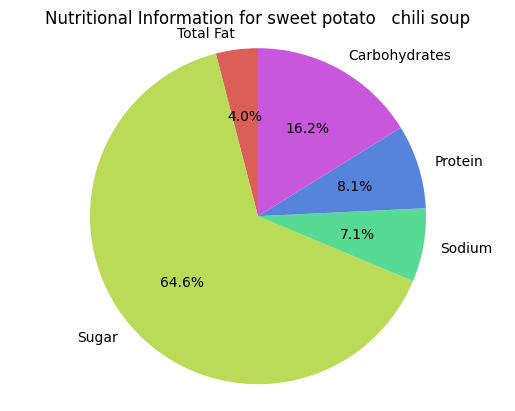


Option 2:
Name: emeril s notches unknown p b j sandwiches
Minutes: 14
Number of Steps: 10
Steps: in a small mixing bowl , combine the peanut butter , strawberry preserves , and marshmallow cream
Description: it's a new twist on an old favorite...and another super kid-friendly recipe from "emeril's there's a chef in my soup! recipes for the kid in everyone" (2002).
Ingredients: ['extra-crunchy peanut butter', 'strawberry preserves', 'marshmallow cream', 'sandwich bread']
Number of Ingredients: 4
Calories: 232.3
Total Fat (PDV): 2.0
Sugar (PDV): 72.0
Sodium (PDV): 14.0
Protein (PDV): 8.0
Saturated Fat (PDV): 1.0
Carbohydrates (PDV): 16.0


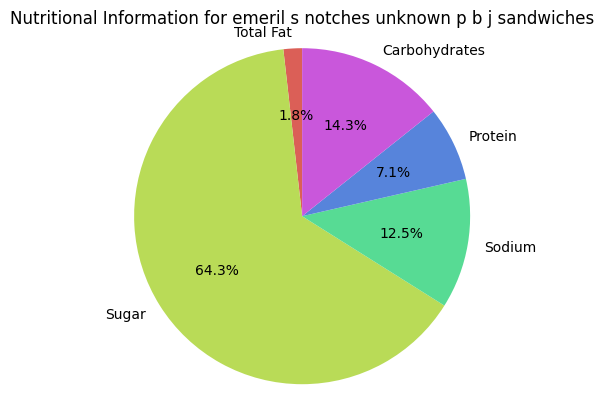


Option 3:
Name: banana on toast
Minutes: 5
Number of Steps: 3
Steps: toast the bread
Description: this is perfect in the mornings, it's got a great taste to it
Ingredients: ['banana', 'bread']
Number of Ingredients: 2
Calories: 238.0
Total Fat (PDV): 3.0
Sugar (PDV): 66.0
Sodium (PDV): 14.0
Protein (PDV): 10.0
Saturated Fat (PDV): 2.0
Carbohydrates (PDV): 17.0


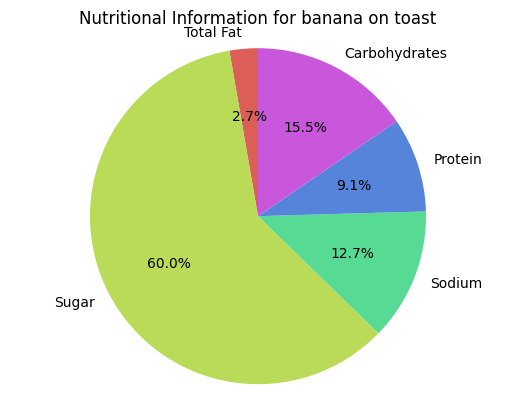


Option 4:
Name: aunt joan s cinnamon rolls
Minutes: 270
Number of Steps: 25
Steps: dough: mix first ingredients with a spoon
Description: my aunt joan makes the best cinnamon rolls (or are they sticky buns?) and my mom and i got her to give us the recipe.  she's been making this recipe since the 1960's.  the measurements and directions aren't precise so please be careful.  joan has been making these so long that these are the directions we were given.  ;) if you bake moderately frequently, you should be fine!  i hope some of you enjoy these as much as we have over the years.  update:  xmas eve 2012  making for first time (big shoes to fill...) spoke with aunt joan.  this recipe makes (2)  9x12 pans - about 12 rolls each.  topping updated; use half in ea pan.  i used 7 c flour - and needed the dough for about 5 minutes.  first 6.5 c into the mix in the bowl and the last bit used to dust the countertop while i kneaded the dough.  in a hurry (xmas eve!) and so warmed the oven to 150 and 

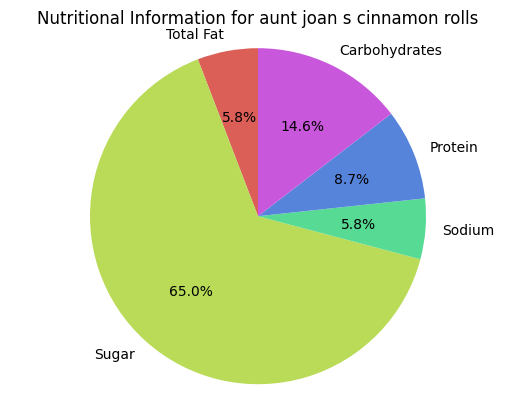


Option 5:
Name: roasted parsnips
Minutes: 45
Number of Steps: 8
Steps: combine the first 5 ingredients in a large zip-top plastic bag
Description: cooking light
Ingredients: ['balsamic vinegar', 'brown sugar', 'fresh rosemary', 'parsnips', 'red onion', 'cooking spray', 'olive oil', 'salt', 'fresh ground black pepper']
Number of Ingredients: 9
Calories: 239.9
Total Fat (PDV): 6.0
Sugar (PDV): 70.0
Sodium (PDV): 13.0
Protein (PDV): 6.0
Saturated Fat (PDV): 3.0
Carbohydrates (PDV): 16.0


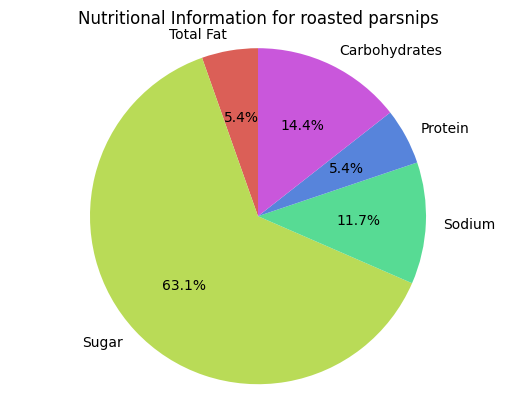


End of Recommendations


In [15]:
import seaborn as sns

# Function to plot a pie chart with a specified color palette
def plot_pie_chart(ax, data, labels):
    # Generate a color palette for the pie chart
    colors = sns.color_palette("Blues", len(data))

    # Create the pie chart with labels, percentage display, and a start angle of 90 degrees
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

    # Ensure the pie chart is circular
    ax.axis('equal')

    # Set background color of the plot
    ax.set_facecolor('#1a1a1a')

# Function to find the closest food items based on nutritional features
def find_closest_food(target_food, target_features, exclude_foods=[]):
    recommended_items = []

    # Identify the cluster of the target food item
    target_cluster_df = food_df.loc[food_df['name'] == target_food, 'cluster']
    if target_cluster_df.empty:
        print(f"Target food {target_food} not found in the dataset.")
        return recommended_items

    target_cluster = target_cluster_df.values[0]

    # Filter foods that belong to the same cluster, excluding already selected foods and the target food
    cluster_recipes = food_df[food_df['cluster'] == target_cluster]
    cluster_recipes = cluster_recipes[~cluster_recipes['name'].isin(exclude_foods + [target_food])]

    # If no food items are left after exclusion, return empty recommendations
    if cluster_recipes.empty:
        print(f"No recipes found in the same cluster as {target_food} after excluding previous recommendations.")
        return recommended_items

    # Calculate the Euclidean distance between the target and each food in the cluster
    cluster_data = clustering_data_standardized[food_df['cluster'] == target_cluster]
    distances = np.linalg.norm(cluster_recipes[columns_for_clustering] - target_features, axis=1)
    cluster_recipes.loc[:, 'distance_to_target'] = distances

    # Sort recipes by distance and select the top 5 closest items
    closest_recipes = cluster_recipes.sort_values(by='distance_to_target').head(5)

    recommended_items.append(closest_recipes)

    return recommended_items

# Dictionary to define meal recommendations (Example: Breakfast)
cal1 = {
    'Breakfast': ['say what   banana sandwich'],
}

# Initialize lists for selected foods and recommended items
selected_foods = []
recommended_items = []

# Variable to control weight loss condition
lose_weight = 1

# Loop through each meal and generate recommendations
for meal_time, foods in cal1.items():
    for food in foods:
        # Get the nutritional features of the target food
        target_features = food_df[food_df['name'] == food][columns_for_clustering].values[0]

        # Find the closest food items to the target food
        closest_food_items = find_closest_food(food, target_features, exclude_foods=selected_foods)

        # Update the list of selected foods with the newly recommended items
        selected_foods.extend(closest_food_items[0]['name'].tolist())
        recommended_items.append(closest_food_items)

    # Display recommendations for the current meal time
    print(f"\n{meal_time} Recommendations for {foods}:")

    # Option number to track the recommended meals
    option_number = 1
    for rec_item in recommended_items:
        print(f"\nClosest 5 Items to {foods}:")

        if not rec_item:
            print(f"\nOption {option_number}: No recommendations found.")
        else:
            # If losing weight, recommend the item with the lowest calorie value from the top 5
            if lose_weight == 1:
                best_recommendation = rec_item[0].sort_values(by='calories').head(5)
            else:
                # Otherwise, recommend the item with the highest calorie value from the top 10
                best_recommendation = rec_item[0].sort_values(by='calories', ascending=False).head(5)

            # Display the details for each recommended item
            for _, row in best_recommendation.iterrows():
                print(f"\nOption {option_number}:")
                print(f"Name: {row['name']}")
                print(f"Minutes: {row['minutes']}")  # Assuming 'minutes' column exists
                print(f"Number of Steps: {row['n_steps']}")  # Assuming 'n_steps' column exists
                print(f"Steps: {eval(row['steps'])[0]}")  # Convert steps from string to list
                print(f"Description: {row['description']}")
                print(f"Ingredients: {row['ingredients']}")
                print(f"Number of Ingredients: {row['n_ingredients']}")  # Assuming 'n_ingredients' column exists
                print(f"Calories: {row['calories']}")
                print(f"Total Fat (PDV): {row['total fat (PDV)']}")
                print(f"Sugar (PDV): {row['sugar (PDV)']}")
                print(f"Sodium (PDV): {row['sodium (PDV)']}")
                print(f"Protein (PDV): {row['protein (PDV)']}")
                print(f"Saturated Fat (PDV): {row['saturated fat (PDV)']}")
                print(f"Carbohydrates (PDV): {row['carbohydrates (PDV)']}")

                # Plot the nutritional information as a pie chart
                fig, ax = plt.subplots()
                nutritional_data = [row.loc['total fat (PDV)'], row.loc['sugar (PDV)'], row.loc['sodium (PDV)'], row.loc['protein (PDV)'], row.loc['carbohydrates (PDV)']]
                nutritional_labels = ['Total Fat', 'Sugar', 'Sodium', 'Protein', 'Carbohydrates']
                plot_pie_chart(ax, nutritional_data, nutritional_labels)

                # Display the pie chart with a title
                plt.title(f"Nutritional Information for {row['name']}")
                plt.show()

                option_number += 1

print("\nEnd of Recommendations")